<a href="https://colab.research.google.com/github/Theosagie/Text-Mining-and-Sentimental-Analysis/blob/main/Hotel_Reviews_Text_mining_and_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK 4 TEXT MINING

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download(['stopwords', 'punkt','wordnet','omw-1.4','vader_lexicon'])
%matplotlib inline



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
data = pd.read_csv('/content/tourist_accommodation_review.csv')

In [ ]:
data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [ ]:
data.shape

(53644, 5)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     53644 non-null  object
 1   Review Date            53644 non-null  object
 2   Location               53644 non-null  object
 3   Hotel/Restaurant name  53644 non-null  object
 4   Review                 53644 non-null  object
dtypes: object(5)
memory usage: 2.0+ MB


In [ ]:
data.isna().sum()

ID                       0
Review Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [ ]:
data.nunique()

ID                       49944
Review Date               2344
Location                    25
Hotel/Restaurant name      537
Review                   49938
dtype: int64

In [ ]:
#Rename column
data=data.rename(columns = {'Hotel/Restaurant name':'Hotel_Restaurant'})

In [ ]:
data.head()

,ID,Review Date,Location,Hotel_Restaurant,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [ ]:
data['Hotel_Restaurant'].value_counts()

Da Mario                                             279
Sabai Sabai                                          200
No.6 Restaurant                                      200
The Pizza Company                                    198
The Family Restaurant                                196
                                                    ... 
Sultan's Grill Authentic Turkish & Indian Cuisine     91
Som Restaurant                                        91
Chez Nicolas                                          90
Dada Yura Restaurant                                  80
Chekhoff Restaurant and Bar                           30
Name: Hotel_Restaurant, Length: 537, dtype: int64

In [ ]:
data['Location'].value_counts()

 Patong              16403
 Karon                5826
 Kata Beach           5752
 Rawai                3811
 Choeng Thale         3378
 Phuket Town          3356
 Kamala               3162
 Mai Khao             2372
 Cape Panwa           1500
 Chalong              1287
 Thalang District     1177
 Kathu                1078
 Nai Yang              996
 Nai Harn              881
 Bang Tao Beach        600
 Karon Beach           397
 Wichit                395
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                98
 Talat Nuea             97
 Nai Thon               94
 Sakhu                  91
Name: Location, dtype: int64

In [ ]:
data['ID'].nunique()

49944

In [ ]:
data['Review'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
53639    False
53640    False
53641    False
53642    False
53643    False
Name: Review, Length: 53644, dtype: bool

In [ ]:
# To check if there are duplicates rows in the Review column. It equals true in case of no duplicates
data['Review'].is_unique



False

In [ ]:
#To find if there are  duplicated reviews
dup_Rows = data[data.duplicated(['Review'])]
dup_Rows

,ID,Review Date,Location,Hotel_Restaurant,Review
383,rn580036469,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,The view and Thai food served at Dee Plee are ...
384,rn580019506,Reviewed 1 week ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,We celebrated our honeymoon at Anantara and tr...
385,rn577321057,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Great Thai Food with and amazing View and Frie...
386,rn577073620,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Was occasionally in this place! Despite it was...
387,rn576749505,Reviewed 2 weeks ago,Choeng Thale,Dee Plee - Anantara Layan Phuket Resort,Dee Plee is the Signature Thai restaurant of t...
...,...,...,...,...,...
53442,rn562985064,"Reviewed February 26, 2018",Phuket Town,Pizza Hut - Jungceylon,I am obsessed with Pizza Hut so could not resi...
53443,rn558515004,"Reviewed February 4, 2018",Phuket Town,Pizza Hut - Jungceylon,I was staying at the branch in Patong Thailand...
53444,rn555370946,"Reviewed January 22, 2018",Phuket Town,Pizza Hut - Jungceylon,I went in PIzza Hut in the main commercial cen...
53445,rn554465446,"Reviewed January 17, 2018",Phuket Town,Pizza Hut - Jungceylon,It is a pizza hut and not a five star restaura...


In [ ]:
#To drop rows that have duplicated column reviews

data_drop = data.drop_duplicates(subset='Review')

In [ ]:
data_drop.shape

(49938, 5)

In [ ]:
data_drop['ID'].nunique()

49938

In [ ]:
data_drop['Location'].value_counts()

 Patong              15110
 Kata Beach           5433
 Karon                5295
 Rawai                3471
 Choeng Thale         3218
 Phuket Town          3126
 Kamala               2930
 Mai Khao             2242
 Cape Panwa           1500
 Chalong              1197
 Thalang District     1066
 Kathu                1018
 Nai Yang              986
 Nai Harn              801
 Bang Tao Beach        600
 Wichit                375
 Karon Beach           367
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                88
 Nai Thon               84
 Talat Nuea             77
 Sakhu                  61
Name: Location, dtype: int64

In [ ]:
data_drop['Location'].value_counts()

 Patong              15110
 Kata Beach           5433
 Karon                5295
 Rawai                3471
 Choeng Thale         3218
 Phuket Town          3126
 Kamala               2930
 Mai Khao             2242
 Cape Panwa           1500
 Chalong              1197
 Thalang District     1066
 Kathu                1018
 Nai Yang              986
 Nai Harn              801
 Bang Tao Beach        600
 Wichit                375
 Karon Beach           367
 Talat Yai             300
 Koh Kaew              293
 Kata Noi Beach        200
 Pa Khlok              100
 Ratsada                88
 Nai Thon               84
 Talat Nuea             77
 Sakhu                  61
Name: Location, dtype: int64

In [ ]:
df = data_drop

In [ ]:
data_drop['Hotel_Restaurant'].nunique()

537

In [ ]:
hotel_names = data_drop['Hotel_Restaurant'].value_counts()

In [ ]:
data_drop['Hotel_Restaurant'].value_counts(normalize=True)

No.6 Restaurant                0.004005
Sabai Sabai                    0.004005
The Family Restaurant          0.003925
The Pizza Company              0.003765
Outdoor Restaurant             0.003464
                                 ...   
Baoli                          0.000380
Baia Del Sole                  0.000240
Chez Nicolas                   0.000180
Dada Yura Restaurant           0.000160
Chekhoff Restaurant and Bar    0.000060
Name: Hotel_Restaurant, Length: 537, dtype: float64

In [ ]:
#The top 30 hotels
hotel_names.head(30)

No.6 Restaurant                                             200
Sabai Sabai                                                 200
The Family Restaurant                                       196
The Pizza Company                                           188
Outdoor Restaurant                                          173
Da Mario                                                    159
Thong Dee The Kathu Brasserie                               100
Sea Hag Restaurant                                          100
Wok                                                         100
Natural Restaurant                                          100
Louis' Kitchen                                              100
Sweet Dream Restaurant                                      100
Tawai Thai Restaurant                                       100
Wine Connection Bar & Grill - Kata Beach                    100
Wine Connection Deli & Bistro - Jungceylon, Patong Beach    100
S&G Family Restaurant                   

In [ ]:
hotel_df = data_drop.loc[(data_drop['Hotel_Restaurant']=='No.6 Restaurant')|(data_drop['Hotel_Restaurant']=='Sabai Sabai')|
                         (data_drop['Hotel_Restaurant']=='The Family Restaurant')|(data_drop['Hotel_Restaurant']=='The Pizza Company')|
                         (data_drop['Hotel_Restaurant']=='Outdoor Restaurant')|(data_drop['Hotel_Restaurant']=='Da Mario')|
                         (data_drop['Hotel_Restaurant']=='Thong Dee The Kathu Brasserie')|(data_drop['Hotel_Restaurant']=='Sea Hag Restaurant')|
                         (data_drop['Hotel_Restaurant']=='Wok')|(data_drop['Hotel_Restaurant']=='Natural Restaurant')|
                         (data_drop['Hotel_Restaurant']=="Louis' Kitchen")|(data_drop['Hotel_Restaurant']=='Sweet Dream Restaurant')|
                         (data_drop['Hotel_Restaurant']=='Tawai Thai Restaurant')|(data_drop['Hotel_Restaurant']=='Wine Connection Bar & Grill - Kata Beach')|
                         (data_drop['Hotel_Restaurant']=='Wine Connection Deli & Bistro - Jungceylon, Patong Beach')|(data_drop['Hotel_Restaurant']=='S&G Family Restaurant')|
                         (data_drop['Hotel_Restaurant']=='The Drunken Leprechaun')|(data_drop['Hotel_Restaurant']=='Happy Days')|
                         (data_drop['Hotel_Restaurant']=='Harrys Steakhouse & Hotel')|(data_drop['Hotel_Restaurant']=='Raya Thai Cuisine')|
                         (data_drop['Hotel_Restaurant']=='Panwa House')|(data_drop['Hotel_Restaurant']=='Lemongrass Restaurant')|
                         (data_drop['Hotel_Restaurant']=='Song Pee Nong')|(data_drop['Hotel_Restaurant']=='Sawasdee Thai Cuisine')|
                         (data_drop['Hotel_Restaurant']=='Sala Bua Restaurant')|(data_drop['Hotel_Restaurant']=='Eurasian Restaurant')|
                         (data_drop['Hotel_Restaurant']=='Kata Villa Restaurant')|(data_drop['Hotel_Restaurant']=='Red Snapper')|
                         (data_drop['Hotel_Restaurant']=="Don's Bar B Q")|(data_drop['Hotel_Restaurant']=='Rum Jungle')].copy()

In [ ]:
hotel_df

,ID,Review Date,Location,Hotel_Restaurant,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...,...,...,...
50012,rn124505427,"Reviewed February 12, 2012",Kathu,Outdoor Restaurant,this place is value for money and a big select...
50013,rn123951108,"Reviewed January 31, 2012",Kathu,Outdoor Restaurant,"Polite, quick service and a great range of foo..."
50014,rn123108916,"Reviewed January 15, 2012",Kathu,Outdoor Restaurant,"Don’t expect much, this is not a place for pic..."
50015,rn122852836,"Reviewed January 9, 2012",Kathu,Outdoor Restaurant,We had our dinner here after we married. There...


In [ ]:
hotels = hotel_df.copy()

In [ ]:

hotel_df['Hotel_Restaurant'].value_counts()

Sabai Sabai                                                 200
No.6 Restaurant                                             200
The Family Restaurant                                       196
The Pizza Company                                           188
Outdoor Restaurant                                          173
Da Mario                                                    159
Sala Bua Restaurant                                         100
Sawasdee Thai Cuisine                                       100
Kata Villa Restaurant                                       100
Don's Bar B Q                                               100
Rum Jungle                                                  100
The Drunken Leprechaun                                      100
Red Snapper                                                 100
Sea Hag Restaurant                                          100
Wok                                                         100
Natural Restaurant                      

In [ ]:
hotel_df.isna().sum()

ID                  0
Review Date         0
Location            0
Hotel_Restaurant    0
Review              0
dtype: int64

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3516 entries, 0 to 50016
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                3516 non-null   object
 1   Review Date       3516 non-null   object
 2   Location          3516 non-null   object
 3   Hotel_Restaurant  3516 non-null   object
 4   Review            3516 non-null   object
dtypes: object(5)
memory usage: 164.8+ KB


In [ ]:
stop_words = nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# To create a function that can be used for pre-porcessing
def process(text):
  tokenised_doc = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
  cleaned_tokens = [word.lower() for word in tokenised_doc if word.lower() not in stop_words]
  stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
  return stemmed_text

In [ ]:
hotel_df['Review'] = hotel_df['Review'].apply(process)

In [ ]:
hotel_df.head()

,ID,Review Date,Location,Hotel_Restaurant,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,"[sunday, roast, lamb, beef, truli, excel, 11ou..."
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"[quietli, set, main, road, nice, atmospher, im..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"[made, reserv, birthday, two, day, advanc, ass..."
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,"[visit, regularli, never, fail, impress, quali..."
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,"[visit, wonder, place, travel, cannot, complai..."


In [ ]:
hotel_df['Review'].head(10)

0    [sunday, roast, lamb, beef, truli, excel, 11ou...
1    [quietli, set, main, road, nice, atmospher, im...
2    [made, reserv, birthday, two, day, advanc, ass...
3    [visit, regularli, never, fail, impress, quali...
4    [visit, wonder, place, travel, cannot, complai...
5    [travel, phuket, everi, year, australia, visit...
6    [roast, beef, lamb, plenti, tender, wait, 30, ...
7    [place, lot, learn, come, thai, cook, meal, co...
8    [restaur, ooz, class, soon, enter, restaur, we...
9    [put, simpli, one, best, dine, experi, ever, t...
Name: Review, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorise = CountVectorizer()
X = vectorise.fit_transform(hotel_df['Review'].map(' '.join))
x= pd.DataFrame(X.toarray(),columns=vectorise.get_feature_names_out())
x.head()

,00,000,0080,0081,0082,0083,0084,0089,008a,008b,...,yuk,yum,yummi,yummmm,yung,zealand,zeeland,zero,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [ ]:
sentiment = SentimentIntensityAnalyzer()

In [ ]:
hotels.head()

,ID,Review Date,Location,Hotel_Restaurant,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [ ]:
hotels['compound'] = [sentiment.polarity_scores(review)['compound'] for review in hotels['Review']]
hotels['neg']= [sentiment.polarity_scores(review)['neg'] for review in hotels['Review']]
hotels['neu']= [sentiment.polarity_scores(review)['neu'] for review in hotels['Review']]
hotels['pos']= [sentiment.polarity_scores(review)['pos'] for review in hotels['Review']]


In [ ]:
hotels.head()

,ID,Review Date,Location,Hotel_Restaurant,Review,compound,neg,neu,pos
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...,0.0516,0.11,0.772,0.118
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere...",0.9237,0.00,0.730,0.270
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...,0.6808,0.00,0.869,0.131
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...,0.8419,0.00,0.823,0.177
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...,0.9734,0.00,0.557,0.443


In [ ]:
hotels[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,3516.000000,3516.000000,3516.000000,3516.000000
mean,0.637913,0.027443,0.748509,0.224051
std,0.432146,0.051863,0.125125,0.132353
min,-0.941600,0.000000,0.298000,0.000000
25%,0.551400,0.000000,0.669000,0.127750
50%,0.827100,0.000000,0.754000,0.218000
75%,0.916900,0.044000,0.838000,0.310000
max,0.989900,0.497000,1.000000,0.690000


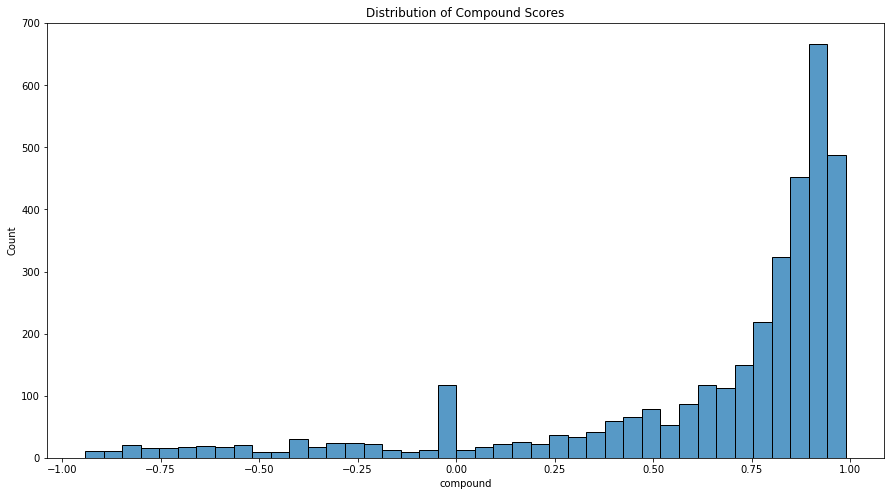

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Compound Scores')
sns.histplot(hotels['compound'])

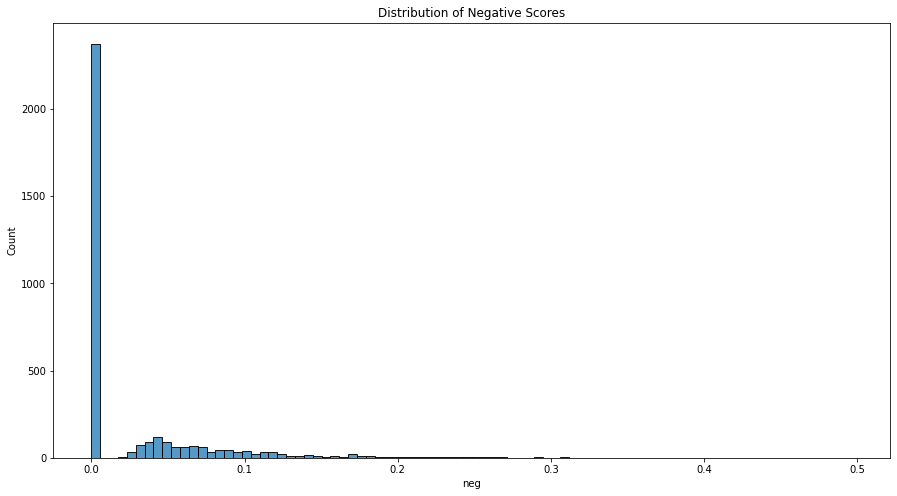

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Negative Scores')
sns.histplot(hotels['neg'])

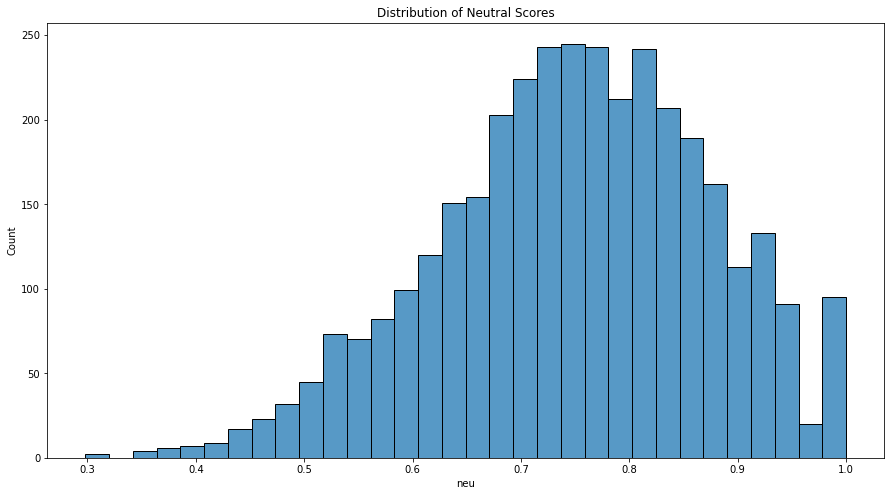

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Neutral Scores')
sns.histplot(hotels['neu'])

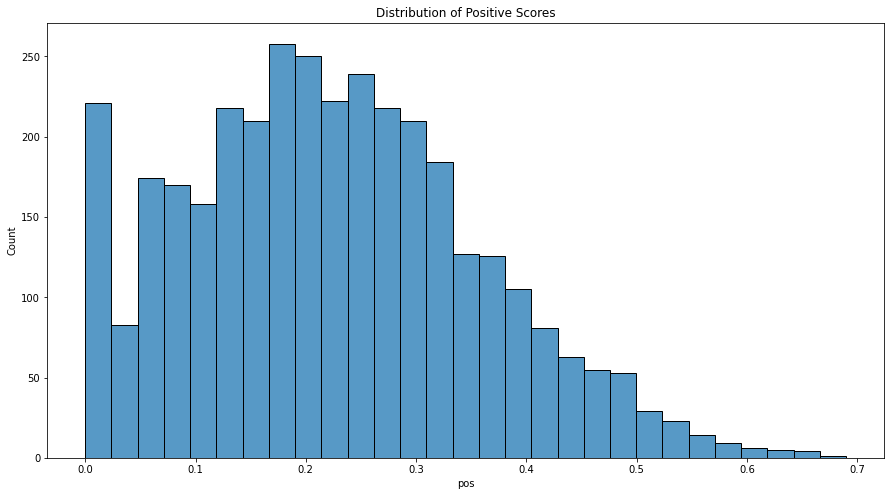

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Distribution of Positive Scores')
sns.histplot(hotels['pos'])

In [ ]:
#No of negative reviews per hotel

In [ ]:
(hotels['compound']<0).groupby(hotels['Hotel_Restaurant']).sum()

Hotel_Restaurant
Da Mario                                                    23
Don's Bar B Q                                                5
Eurasian Restaurant                                         11
Happy Days                                                   8
Harrys Steakhouse & Hotel                                    9
Kata Villa Restaurant                                        7
Lemongrass Restaurant                                        8
Louis' Kitchen                                               6
Natural Restaurant                                          17
No.6 Restaurant                                             14
Outdoor Restaurant                                          36
Panwa House                                                  7
Raya Thai Cuisine                                            9
Red Snapper                                                 19
Rum Jungle                                                   5
S&G Family Restaurant                 

In [ ]:
#No of positive reviews per hotel
(hotels['compound']>0).groupby(hotels['Hotel_Restaurant']).sum()

Hotel_Restaurant
Da Mario                                                    128
Don's Bar B Q                                                90
Eurasian Restaurant                                          85
Happy Days                                                   91
Harrys Steakhouse & Hotel                                    89
Kata Villa Restaurant                                        90
Lemongrass Restaurant                                        88
Louis' Kitchen                                               90
Natural Restaurant                                           80
No.6 Restaurant                                             182
Outdoor Restaurant                                          131
Panwa House                                                  92
Raya Thai Cuisine                                            85
Red Snapper                                                  79
Rum Jungle                                                   92
S&G Family Restaurant  

In [ ]:
#%negative reviews
negative_percentage= pd.DataFrame((hotels['compound']<0).groupby(hotels['Hotel_Restaurant']).sum()/hotels['Hotel_Restaurant'].groupby(hotels['Hotel_Restaurant']).count()*100,
                                  columns=['Percentage negative reviews']).sort_values(by='Percentage negative reviews')

In [ ]:
negative_percentage

,Percentage negative reviews
Hotel_Restaurant,
Thong Dee The Kathu Brasserie,1.000000
Sweet Dream Restaurant,2.000000
S&G Family Restaurant,3.000000
Sala Bua Restaurant,4.000000
The Family Restaurant,4.591837
Rum Jungle,5.000000
Don's Bar B Q,5.000000
Sawasdee Thai Cuisine,5.000000
Louis' Kitchen,6.000000


In [ ]:
#%Positive reviews
positive_percentage= pd.DataFrame((hotels['compound']>0).groupby(hotels['Hotel_Restaurant']).sum()/hotels['Hotel_Restaurant'].groupby(hotels['Hotel_Restaurant']).count()*100,
                                  columns=['Percentage positive reviews']).sort_values(by='Percentage positive reviews')
positive_percentage                      

,Percentage positive reviews
Hotel_Restaurant,
Outdoor Restaurant,75.722543
The Pizza Company,77.127660
Red Snapper,79.000000
Natural Restaurant,80.000000
Da Mario,80.503145
Sea Hag Restaurant,83.000000
Eurasian Restaurant,85.000000
Raya Thai Cuisine,85.000000
Tawai Thai Restaurant,86.000000


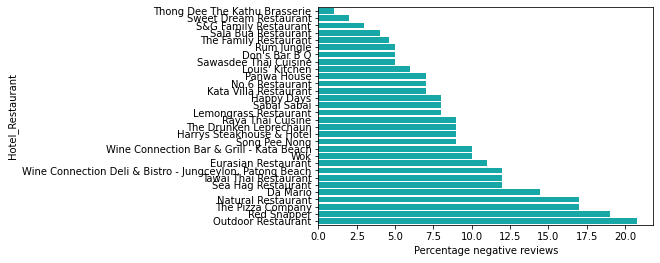

In [ ]:
#Plot
sns.barplot(data=negative_percentage, x='Percentage negative reviews',y=negative_percentage.index, color='c' )

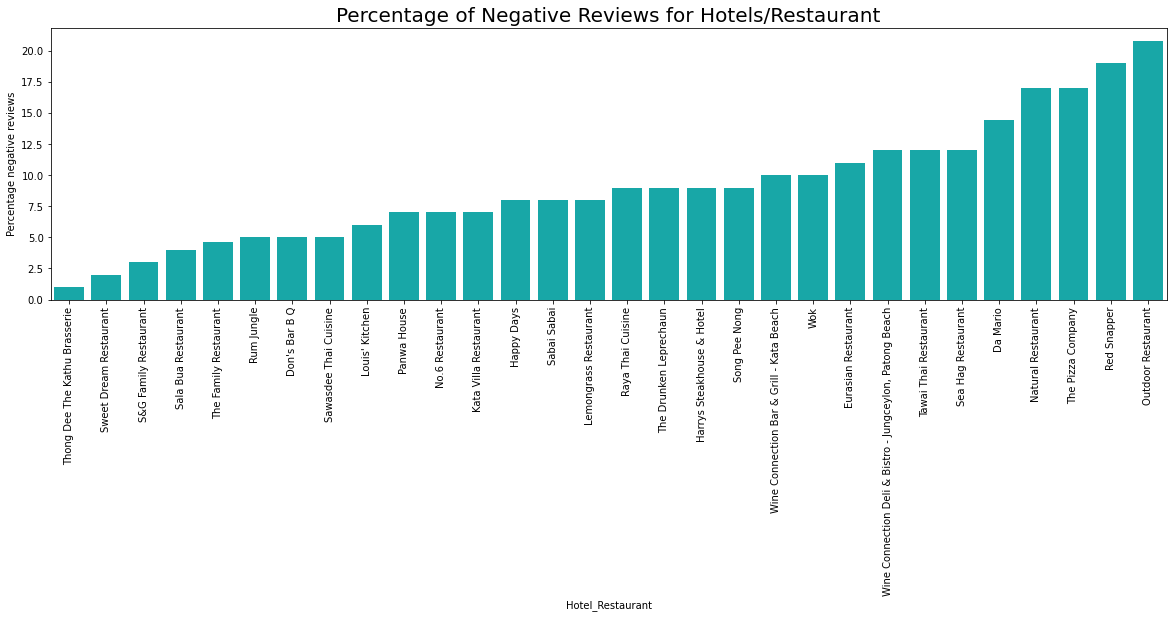

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.title('Percentage of Negative Reviews for Hotels/Restaurant', fontsize = 20)
plt.rcParams.update({'font.size':10})
sns.barplot(data=negative_percentage, y='Percentage negative reviews',x=negative_percentage.index, color='c' )


In [ ]:
hotels['Hotel_Restaurant'].value_counts(normalize=True)

Sabai Sabai                                                 0.056883
No.6 Restaurant                                             0.056883
The Family Restaurant                                       0.055745
The Pizza Company                                           0.053470
Outdoor Restaurant                                          0.049204
Da Mario                                                    0.045222
Sala Bua Restaurant                                         0.028441
Sawasdee Thai Cuisine                                       0.028441
Kata Villa Restaurant                                       0.028441
Don's Bar B Q                                               0.028441
Rum Jungle                                                  0.028441
The Drunken Leprechaun                                      0.028441
Red Snapper                                                 0.028441
Sea Hag Restaurant                                          0.028441
Wok                               

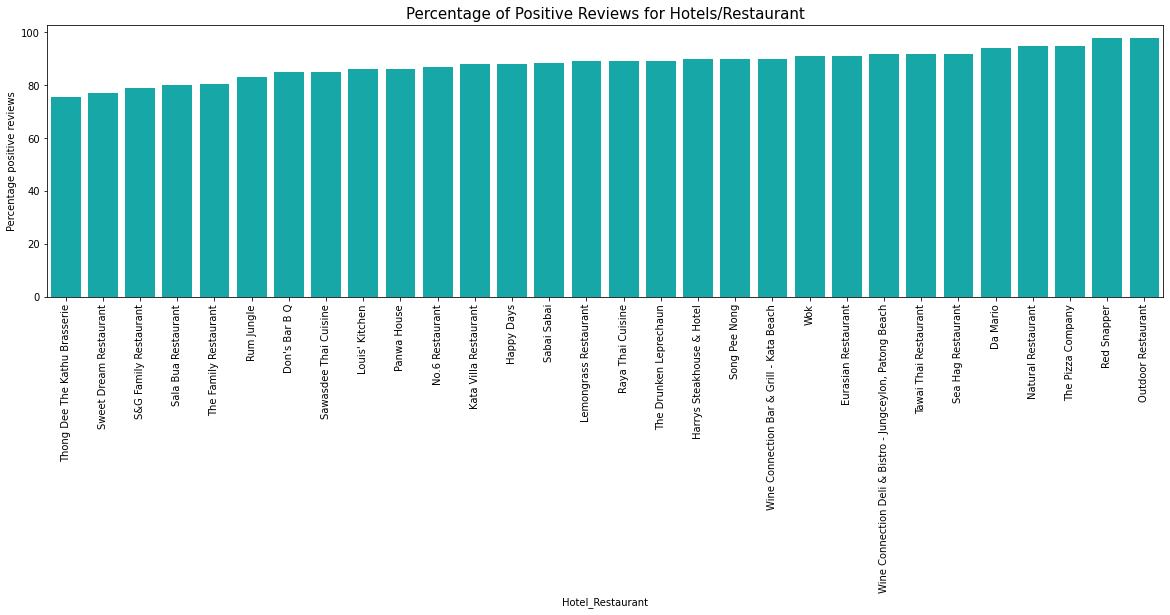

In [ ]:
plt.figure(figsize=(20,5))
plt.xticks(rotation='vertical')
plt.title('Percentage of Positive Reviews for Hotels/Restaurant', fontsize = 15)
plt.rcParams.update({'font.size':11})
sns.barplot(data=positive_percentage, y='Percentage positive reviews',x=negative_percentage.index, color='c' )

In [ ]:
hotels['process_review'] = hotels['Review'].apply(process)


In [ ]:


hotels_positive_subset = hotels.loc[(hotels['Hotel_Restaurant']=='Outdoor Restaurant')& (hotels['compound']>0),:]

In [ ]:
hotels_negative_subset = hotels.loc[(hotels['Hotel_Restaurant']=='Outdoor Restaurant')& (hotels['compound']<=0),:]

In [ ]:
hotels_positive_subset

,ID,Review Date,Location,Hotel_Restaurant,Review,compound,neg,neu,pos,process_review
49329,rn579762089,Reviewed 1 week ago,Kata Beach,Outdoor Restaurant,Visited this restaurant a few times over the y...,0.9686,0.000,0.570,0.430,"[visit, restaur, time, year, never, disappoint..."
49330,rn570761470,"Reviewed April 3, 2018",Kata Beach,Outdoor Restaurant,"Lobster I love , this is the place for fresh s...",0.9493,0.000,0.397,0.603,"[lobster, love, place, fresh, shellfish, excel..."
49331,rn567107219,"Reviewed March 17, 2018",Kata Beach,Outdoor Restaurant,"The service here was attentive, as you come ac...",0.8934,0.040,0.737,0.223,"[servic, attent, come, accustom, thailand, foo..."
49333,rn557927633,"Reviewed February 2, 2018",Kata Beach,Outdoor Restaurant,This place is not really recommanded for good ...,0.8813,0.000,0.792,0.208,"[place, realli, recommand, good, food, much, m..."
49335,rn534496919,"Reviewed October 19, 2017",Kata Beach,Outdoor Restaurant,Had a light dinner here on our first night in ...,0.9524,0.000,0.603,0.397,"[light, dinner, first, night, kata, veg, sprin..."
...,...,...,...,...,...,...,...,...,...,...
50012,rn124505427,"Reviewed February 12, 2012",Kathu,Outdoor Restaurant,this place is value for money and a big select...,0.3400,0.000,0.821,0.179,"[place, valu, money, big, select, choos]"
50013,rn123951108,"Reviewed January 31, 2012",Kathu,Outdoor Restaurant,"Polite, quick service and a great range of foo...",0.8126,0.000,0.598,0.402,"[polit, quick, servic, great, rang, food, free..."
50014,rn123108916,"Reviewed January 15, 2012",Kathu,Outdoor Restaurant,"Don’t expect much, this is not a place for pic...",0.4754,0.000,0.933,0.067,"[expect, much, place, picki, travel, god, forb..."
50015,rn122852836,"Reviewed January 9, 2012",Kathu,Outdoor Restaurant,We had our dinner here after we married. There...,0.9402,0.000,0.584,0.416,"[dinner, marri, 16, us, organis, us, love, tab..."


In [ ]:
hotels_negative_subset.head()

,ID,Review Date,Location,Hotel_Restaurant,Review,compound,neg,neu,pos,process_review
49332,rn560403253,"Reviewed February 14, 2018",Kata Beach,Outdoor Restaurant,We’ve been visiting this restaurant for years ...,-0.3182,0.137,0.751,0.112,"[visit, restaur, year, alway, favourit, howev,..."
49334,rn548049703,"Reviewed December 19, 2017",Kata Beach,Outdoor Restaurant,We decided to eat here based on it being regul...,-0.8445,0.182,0.818,0.000,"[decid, eat, base, regularli, busi, pass, bad,..."
49338,rn520177037,"Reviewed September 1, 2017",Kata Beach,Outdoor Restaurant,Had dinner here There were 4 of us and food wa...,-0.1796,0.104,0.828,0.068,"[dinner, 4, us, food, quit, good, servic, prob..."
49349,rn458172885,"Reviewed February 8, 2017",Kata Beach,Outdoor Restaurant,WE tried 12 different restaurants for Dinner (...,-0.5829,0.086,0.914,0.000,"[tri, 12, differ, restaur, dinner, other, lunc..."
49354,rn442823116,"Reviewed December 8, 2016",Kata Beach,Outdoor Restaurant,My boyfriend and I were looking for somewhere ...,0.0000,0.000,1.000,0.000,"[boyfriend, look, somewher, eat, night, went, ..."


In [ ]:
#WordlCloud Negative
negative_tokens = [word for review in hotels_negative_subset['process_review'] for word in review]

In [ ]:
negative_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(negative_tokens))

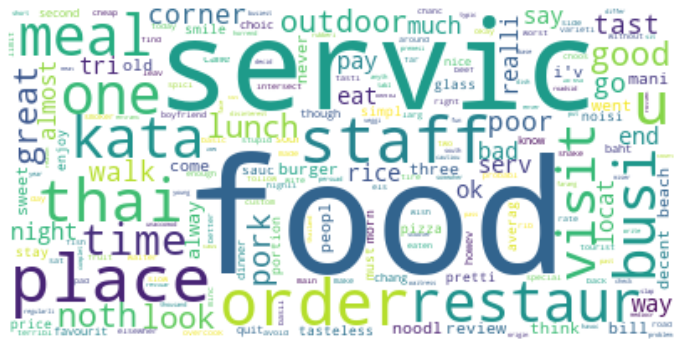

In [ ]:
#visualise the generated image
plt.figure(figsize=(12,12))
plt.imshow(negative_wordcloud, interpolation='bilinear')

plt.axis("off")
plt.show()

In [ ]:
#Usinf frequency dist
from nltk.probability import FreqDist




In [ ]:
negative_freq_dist = FreqDist(negative_tokens)

In [ ]:
negative_freq_dist.tabulate(15)

   food  servic   place   staff   order    thai restaur    busi     one    meal    kata   visit    time    good    noth 
     25      14      11      10      10       9       8       8       8       8       8       7       7       7       7 


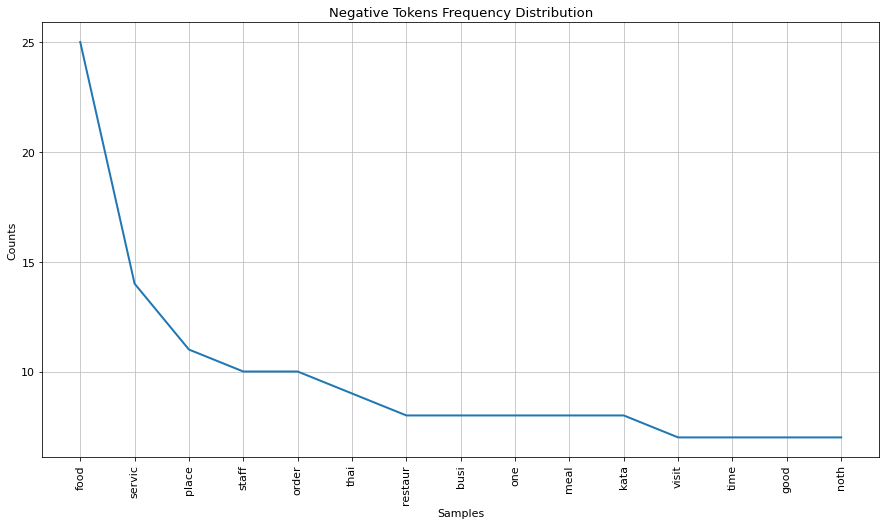

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Negative Tokens Frequency Distribution')
plt.rcParams.update({'font.size':30})

negative_freq_dist.plot(15)

In [ ]:
#Positives

In [ ]:
#WordlCloud Positive
positive_tokens = [word for review in hotels_positive_subset['process_review'] for word in review]

In [ ]:
positive_wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(positive_tokens))

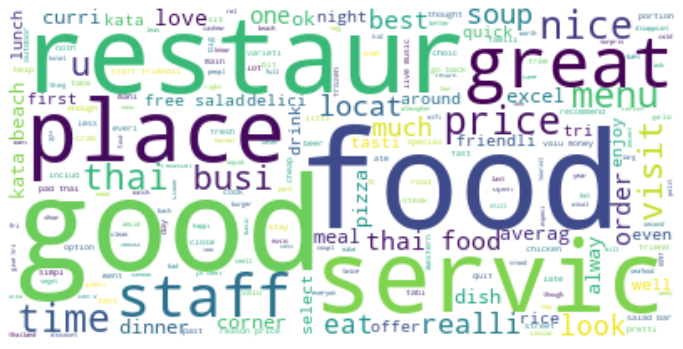

In [ ]:
#visualise the generated image
plt.figure(figsize=(12,12))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
positive_freq_dist = FreqDist(positive_tokens)

In [ ]:
positive_freq_dist.tabulate(15)

    food     good  restaur   servic     thai    place    great    price    staff     nice     time     kata     menu    salad friendli 
     108       85       54       47       45       42       37       37       36       26       25       25       23       22       21 


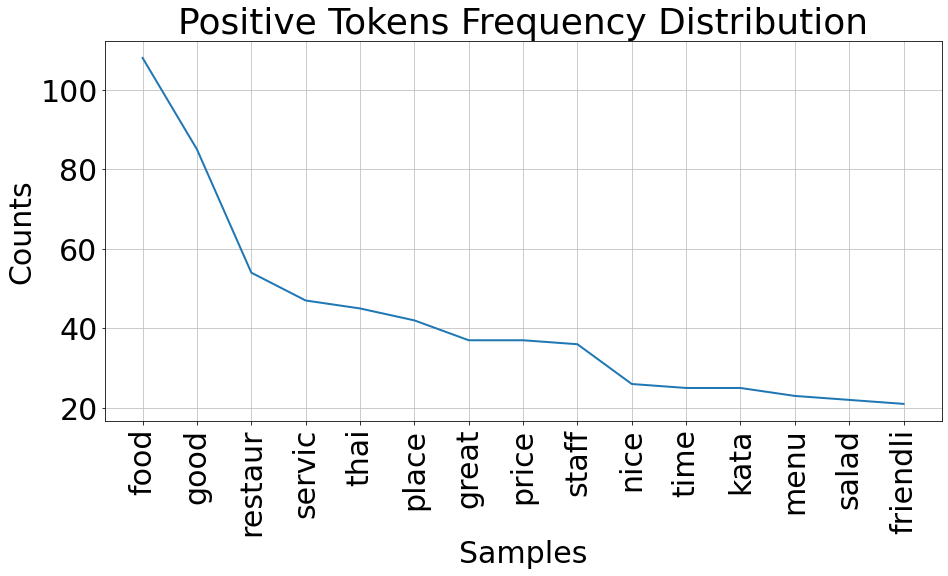

In [ ]:
plt.figure(figsize=(15,7))

plt.title('Positive Tokens Frequency Distribution')
plt.rcParams.update({'font.size':25})
positive_freq_dist.plot(15)

